In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [53]:
df_raw = pd.read_csv("train.csv")

In [54]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df_raw.columns=df_raw.columns.str.lower()

In [56]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')

In [57]:
df = df_raw[['pclass','sex', 'age', 'sibsp','parch','fare','embarked','survived']]

In [58]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [51]:
pp.ProfileReport(df)

c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [60]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [61]:
gender = {'male':0,'female':1}
port = {'S':0, 'C':1,'Q':2}
df['sex']=df['sex'].map(gender)
df['embarked']=df['embarked'].map(port)

c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,1
3,1,1,35.0,1,0,53.1000,0.0,1
4,3,0,35.0,0,0,8.0500,0.0,0


In [63]:
df.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64

In [64]:
### removing duplicates

In [67]:
df.shape

(891, 8)

In [69]:
df.duplicated().sum()

111

In [71]:
df = df.drop_duplicates(keep='first')

In [72]:
df.shape

(780, 8)

In [40]:
### Impute missing values

In [73]:
from sklearn.impute import KNNImputer

In [74]:
copy = df.values.copy()

In [75]:
imp = KNNImputer(weights='distance')
copy = imp.fit_transform(copy)

In [76]:
df_imp = pd.DataFrame(copy, columns=df.columns)

In [110]:
df_imp['embarked']=df_imp['embarked'].round()
df_imp['age']=df_imp['age'].round()

In [111]:
df_imp.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,1.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0


In [112]:
df_imp.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [113]:
### create dummy vars

In [145]:
df_dum = pd.get_dummies(df_imp,drop_first=False, prefix_sep = '_', columns = ['sex','embarked'])

In [146]:
### separate X and Y

In [148]:
df_dum.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived', 'sex_0.0',
       'sex_1.0', 'embarked_0.0', 'embarked_1.0', 'embarked_2.0'],
      dtype='object')

In [198]:
### feature selection
for i in df_dum.columns:
    print(i)
    print(np.corrcoef(df_dum[i], df_dum['survived']))
    

pclass
[[ 1.         -0.33624387]
 [-0.33624387  1.        ]]
age
[[ 1.         -0.09013546]
 [-0.09013546  1.        ]]
sibsp
[[ 1.        -0.0375968]
 [-0.0375968  1.       ]]
parch
[[1.         0.06966931]
 [0.06966931 1.        ]]
fare
[[1.         0.24666908]
 [0.24666908 1.        ]]
survived
[[1. 1.]
 [1. 1.]]
sex_0.0
[[ 1.         -0.51361499]
 [-0.51361499  1.        ]]
sex_1.0
[[1.         0.51361499]
 [0.51361499 1.        ]]
embarked_0.0
[[ 1.         -0.13545457]
 [-0.13545457  1.        ]]
embarked_1.0
[[1.         0.17656484]
 [0.17656484 1.        ]]
embarked_2.0
[[ 1.       -0.039142]
 [-0.039142  1.      ]]


<AxesSubplot:>

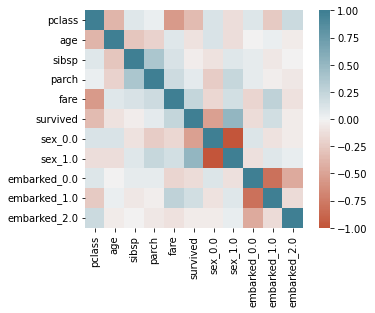

In [199]:
import seaborn as sns
sns.heatmap(df_dum.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [200]:
selected_features = ['pclass', 'age', 'fare', 'sex_0.0', 'sex_1.0', 'embarked_0.0', 'embarked_1.0', 'survived']

In [201]:
df_sel = df_dum[selected_features]

In [202]:
X = df_sel.iloc[:,0:7].values
y = df_dum[['survived']].values

In [203]:
### Treat imbalaned data

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
X,y = SMOTE(random_state = 712).fit_resample(X,y)

In [213]:
X=X.round()

In [214]:
X.shape

(916, 7)

In [215]:
y.shape

(916,)

In [216]:
X_cols = ['pclass', 'age', 'fare', 'sex_0.0', 'sex_1.0', 'embarked_0.0', 'embarked_1.0']

In [219]:
X

array([[ 3., 22.,  7., ...,  0.,  1.,  0.],
       [ 1., 38., 71., ...,  1.,  0.,  1.],
       [ 3., 26.,  8., ...,  1.,  1.,  0.],
       ...,
       [ 3., 25.,  8., ...,  0.,  1.,  0.],
       [ 1., 35., 52., ...,  1.,  1.,  0.],
       [ 3., 16.,  8., ...,  1.,  0.,  0.]])

In [220]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0.

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [222]:
### Find tune for decision tree

In [283]:
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[None, 20, 50, 70, 100]
              }

In [284]:
tree = DecisionTreeClassifier(random_state=712)

In [285]:
tgscv = GridSearchCV(tree, param_grid, cv=5)

In [286]:
tgscv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=712),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 20, 50, 70, 100]})

In [287]:
tgscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=712)

In [288]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=712)
cv_score = cross_val_score(dt,X,y,cv=5).mean()

In [289]:
cv_score

0.8068781183178902

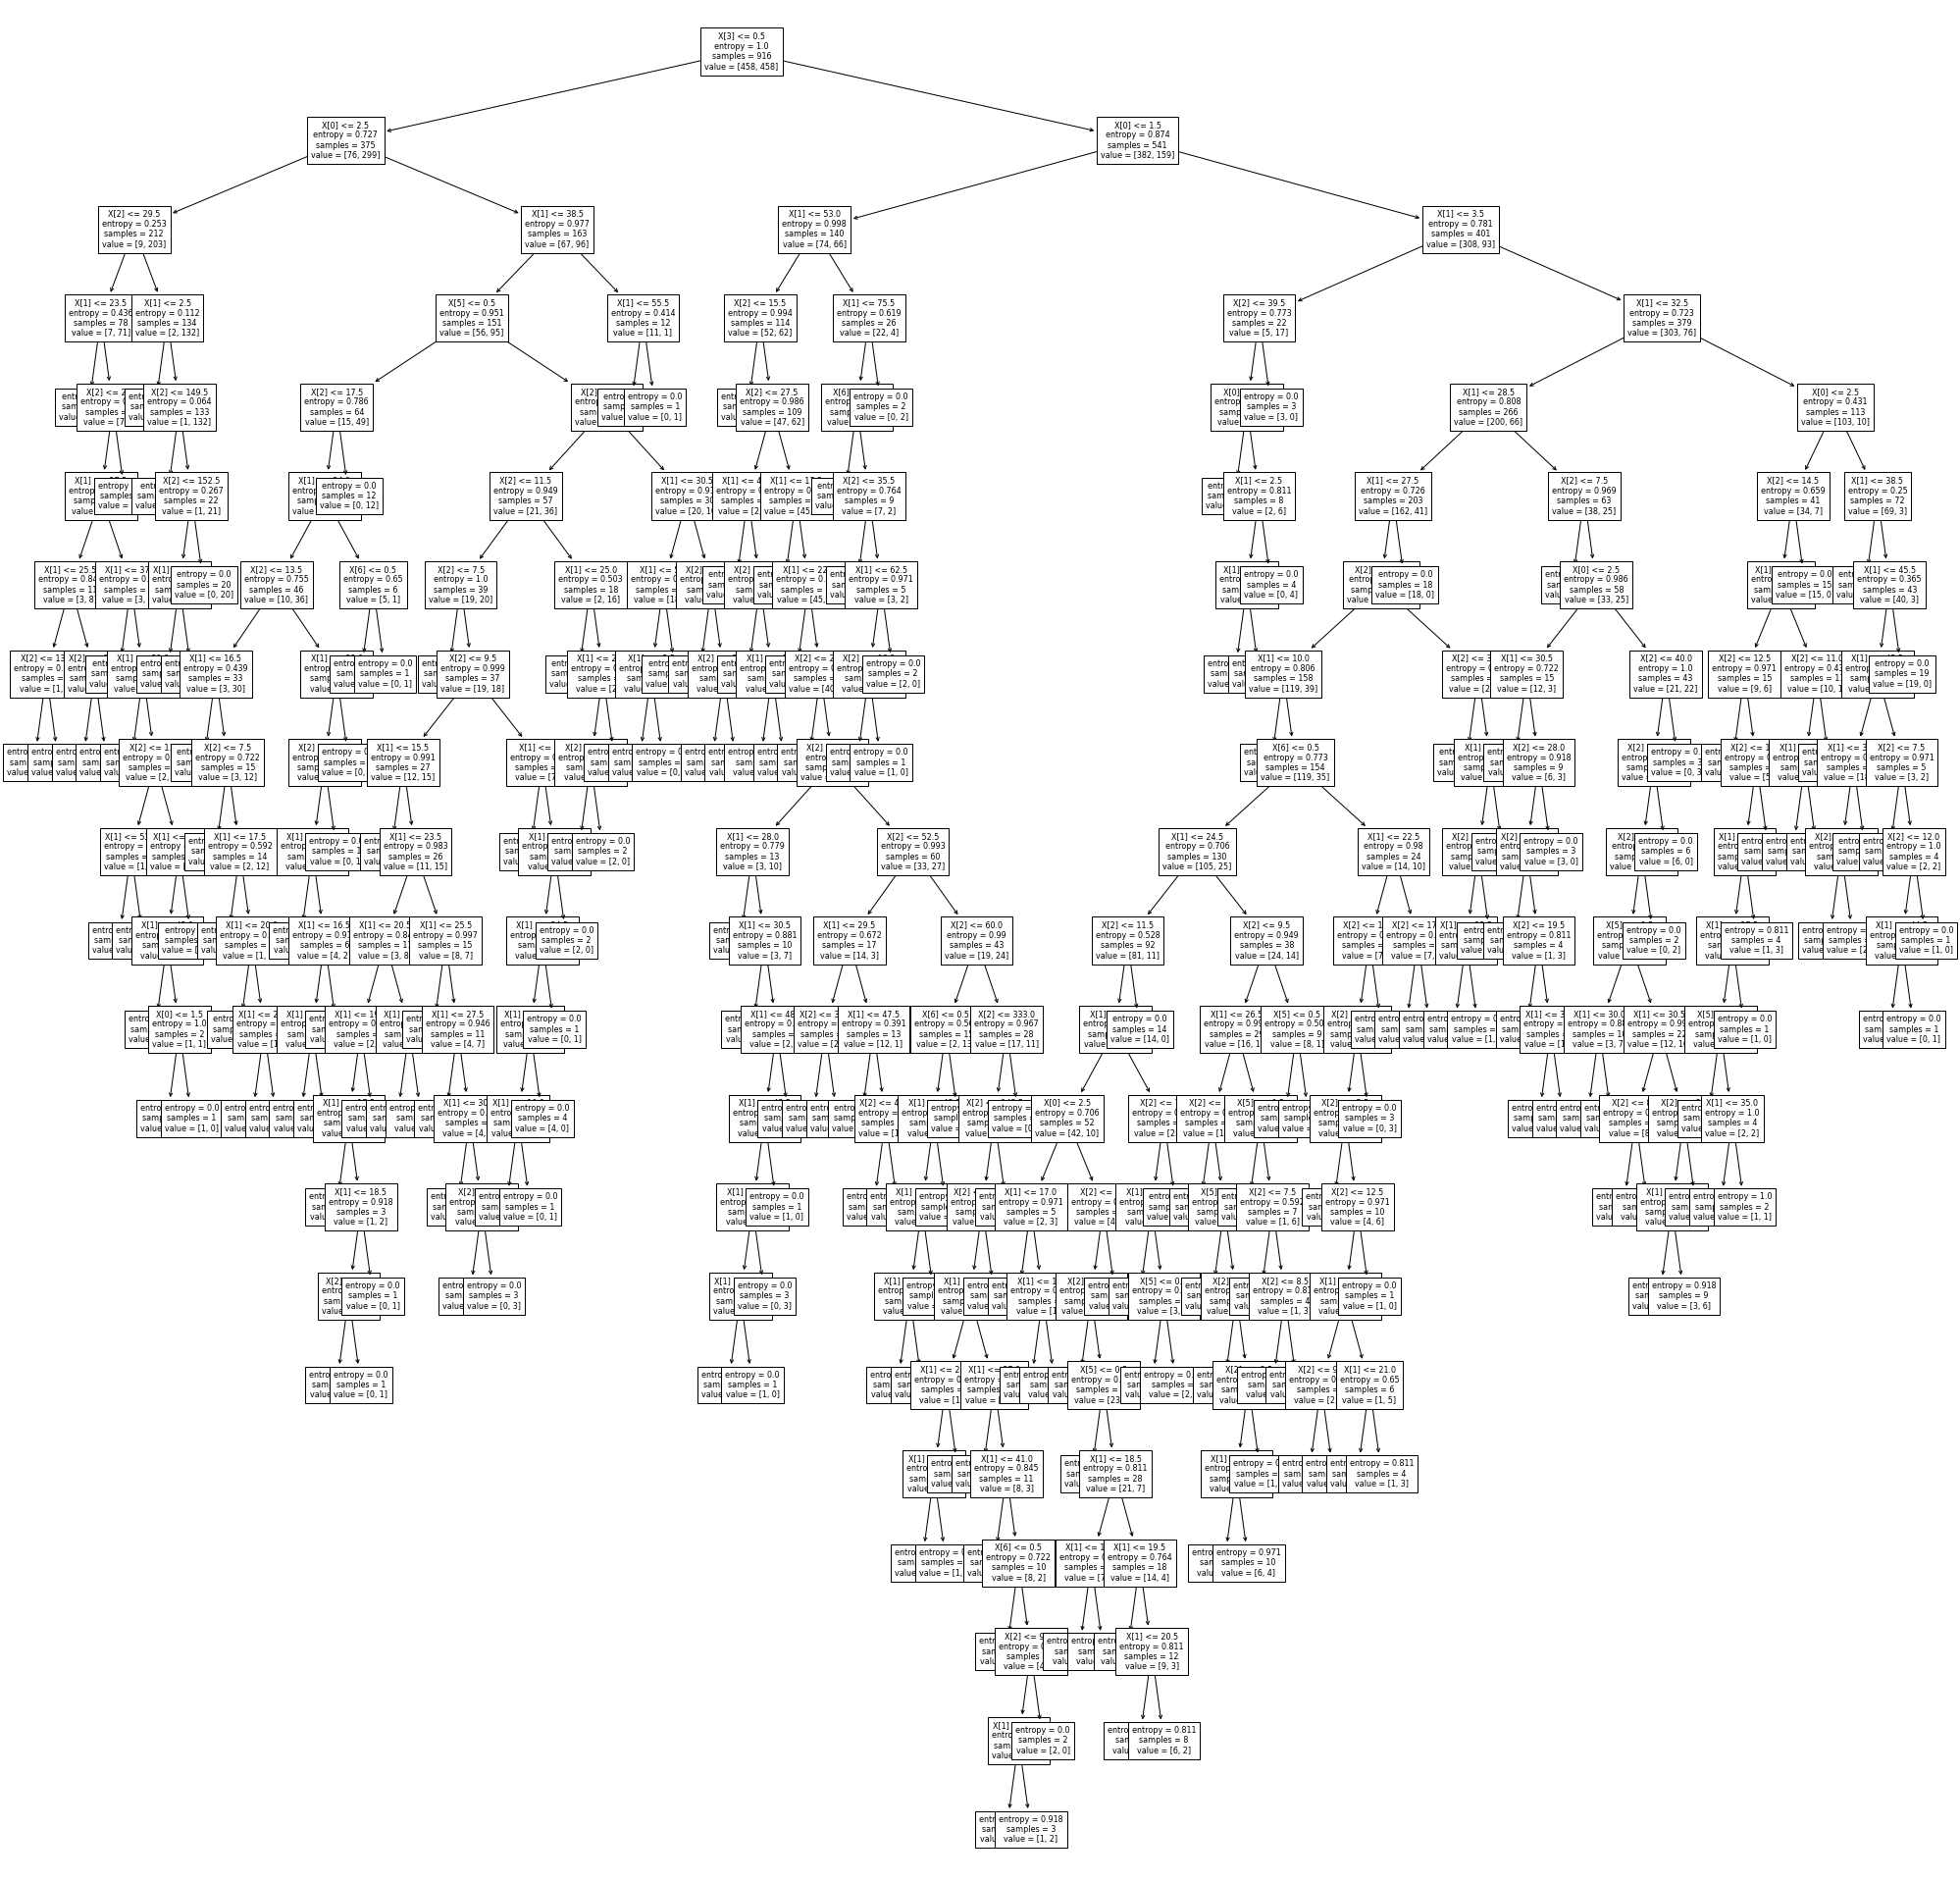

In [290]:
dt.fit(X, y)
from sklearn import tree
plt.figure(figsize=(35,35))
tree.plot_tree(dt.fit(X, y), fontsize=8);


In [252]:
### Find tune for Random Forest

In [258]:
# criterion 
criterion =['gini','entropy']
# Number of trees in random forest
n_estimators = [400, 600, 800, 1200, 1400, 1600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [None, 20, 50, 70, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
param_grid =  {'criterion' : criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [259]:
rf = RandomForestClassifier(random_state=712)

In [260]:
rfgscv = GridSearchCV(rf,param_grid, cv=5 )

In [261]:
rfgscv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=712),
             param_grid={'bootstrap': [False], 'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 20, 50, 70, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [400, 600, 800, 1200, 1400, 1600]})

In [262]:
rfgscv.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=712)

In [263]:
rfgscv.best_score_

0.8264670943216916

In [264]:
rf_tuned = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=712)
rfcv_score = cross_val_score(rf_tuned,X,y,cv=5)

In [265]:
rfcv_score

array([0.7826087 , 0.86885246, 0.78142077, 0.87431694, 0.82513661])

In [266]:
rfcv_score.mean()

0.8264670943216916